In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [266]:
## loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv('dataset.csv')

In [267]:
## first 5 rows of the dataframe
dataset.head()

,age,gender,bmi,children,smoker,state,charges
0,19,female,27.900,0,yes,telangana,168840.9240
1,18,male,33.770,1,no,andhrapradesh,17250.5523
2,28,male,33.000,3,no,andhrapradesh,44490.4620
3,33,male,22.705,0,no,tamilnadu,219840.4706
4,32,male,28.880,0,no,tamilnadu,38660.8552


In [268]:
## number of rows and columns
dataset.shape

(1339, 7)

In [269]:
## getting some informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   int64  
 1   gender    1339 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1339 non-null   int64  
 4   smoker    1339 non-null   object 
 5   state     1339 non-null   object 
 6   charges   1339 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB


In [270]:
## checking for missing values
dataset.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
state       0
charges     0
dtype: int64

#### Data Analisys

In [271]:
## statistical Measures of the dataset
dataset.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,39.194922,30.658047,1.094100,132518.813628
std,14.051691,6.099050,1.205414,120916.854811
min,18.000000,15.960000,0.000000,11210.873900
25%,26.500000,26.255000,0.000000,47285.502375
50%,39.000000,30.400000,1.000000,93770.904700
75%,51.000000,34.687500,2.000000,166215.607600
max,64.000000,53.130000,5.000000,637700.428000


<Figure size 600x600 with 0 Axes>

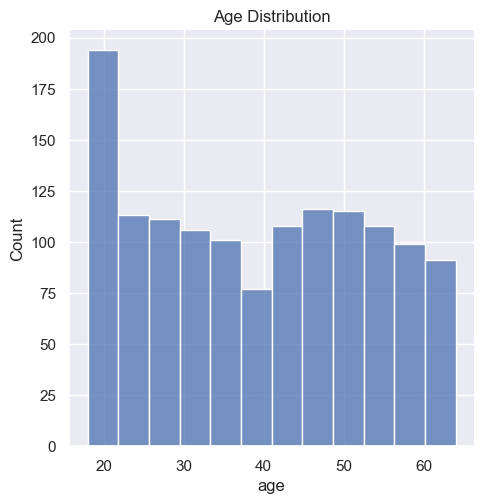

In [272]:
## distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.displot(dataset['age'])
plt.title('Age Distribution')
plt.show()

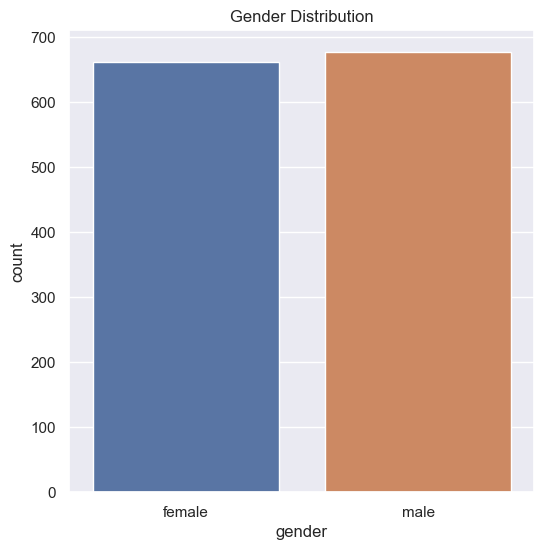

male      677
female    662
Name: gender, dtype: int64

In [273]:
## Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'gender', data = dataset)
plt.title('Gender Distribution')
plt.show()
dataset['gender'].value_counts()

<Figure size 600x600 with 0 Axes>

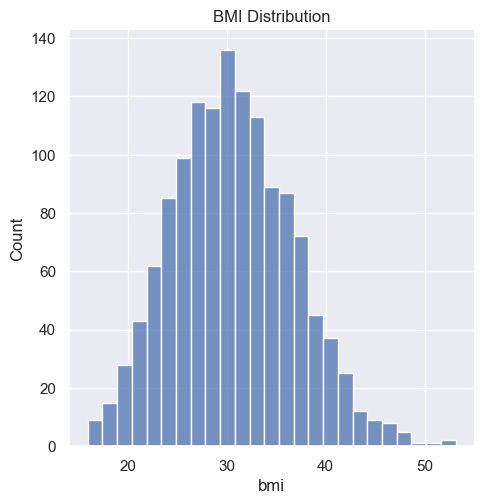

In [274]:
## bmi distribution
plt.figure(figsize = (6,6))
sns.displot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

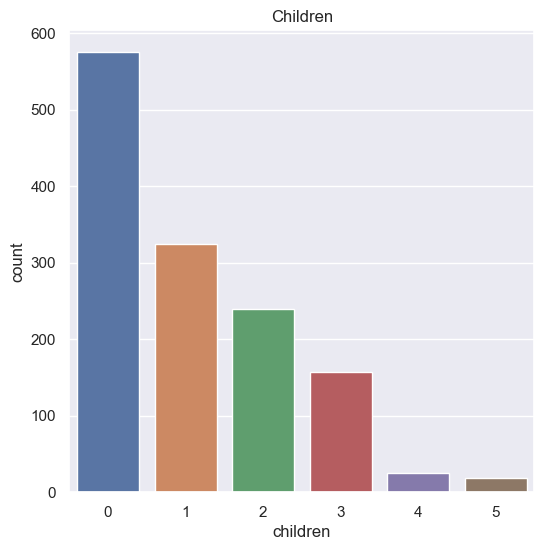

In [275]:
## children column
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = dataset)
plt.title('Children')
plt.show()

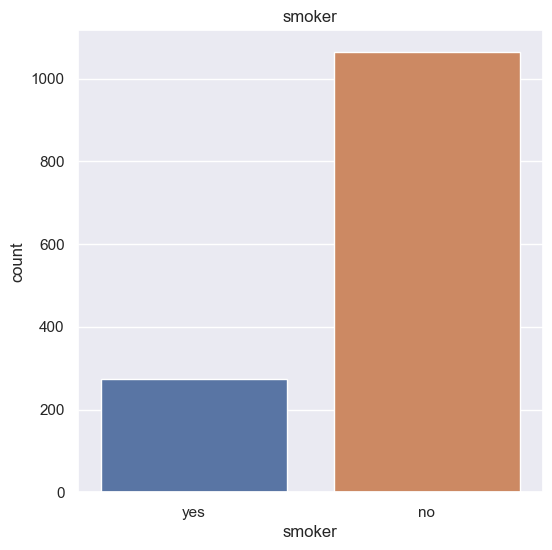

In [276]:
## smoker column
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = dataset)
plt.title('smoker')
plt.show()

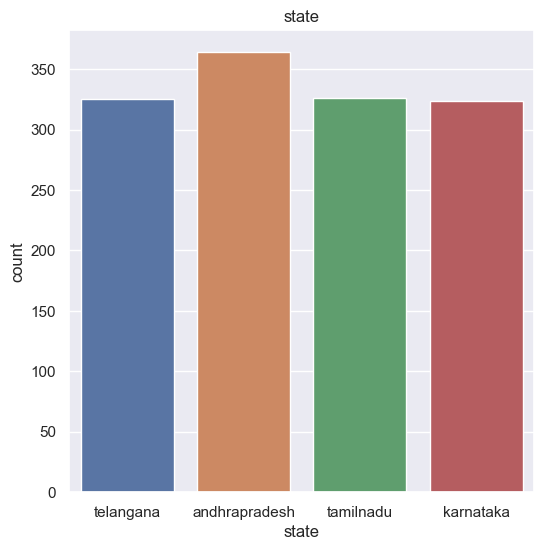

In [277]:
# state column
plt.figure(figsize = (6,6))
sns.countplot(x='state', data = dataset)
plt.title('state')
plt.show()

<Figure size 600x600 with 0 Axes>

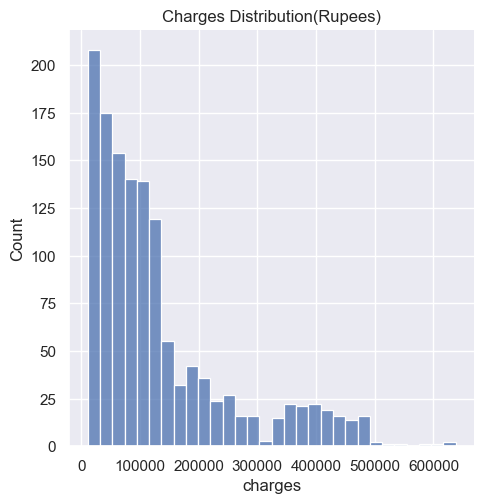

In [278]:
## distribution of charges value
plt.figure(figsize = (6,6))
sns.displot(dataset['charges'])
plt.title('Charges Distribution(Rupees)')
plt.show()

## Data Pre-Processing

#### Encoding the categorical features
    1. Gender
    2. Smoker
    3. State

In [279]:
## encoding sex column
dataset.replace({'gender':{'male':0,'female':1}}, inplace=True)

## encoding 'smoker' column
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

## encoding 'region' column
dataset.replace({'state':{'andhrapradesh':0,'telangana':1,'karnataka':2,'tamilnadu':3}}, inplace=True)

#### Splitting the Features and Target

In [280]:
X = dataset.drop(columns='charges', axis=1)
y = dataset['charges']

In [281]:
print(X)

      age  gender     bmi  children  smoker  state
0      19       1  27.900         0       0      1
1      18       0  33.770         1       1      0
2      28       0  33.000         3       1      0
3      33       0  22.705         0       1      3
4      32       0  28.880         0       1      3
...   ...     ...     ...       ...     ...    ...
1334   18       1  31.920         0       1      2
1335   18       1  36.850         0       1      0
1336   21       1  25.800         0       1      1
1337   61       1  29.070         0       0      3
1338   23       0  23.500         0       0      3

[1339 rows x 6 columns]


In [282]:
print(y)

0       168840.9240
1        17250.5523
2        44490.4620
3       219840.4706
4        38660.8552
           ...     
1334     22050.9808
1335     16290.8335
1336     20070.9450
1337    291410.3603
1338    238780.4500
Name: charges, Length: 1339, dtype: float64


#### Splitting the data into Training data & Testing Data

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [284]:
print(X.shape, X_train.shape, X_test.shape)

(1339, 6) (1071, 6) (268, 6)


## Model Training

#### Linear Regression

In [285]:
## loading the Linear Regression model
regressor = LinearRegression()

In [286]:
regressor.fit(X_train.values, y_train)

LinearRegression()

## Model Evaluation

In [287]:
## prediction on training data
training_data_prediction = regressor.predict(X_train)

C:\Users\Prakash Reddy\.conda\envs\medicalpred\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [288]:
## R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.7456971198554829


In [289]:
## prediction on test data
test_data_prediction = regressor.predict(X_test)

C:\Users\Prakash Reddy\.conda\envs\medicalpred\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [290]:
## R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7396639593486458


## Building a Predictive System

In [292]:
input_data = (18,0,34.1,0,1,0) #,11370.011

## changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The medical cost is Rs.', prediction[0])

The medical cost is Rs. 33764.86068213705
